# Обзор литературы

## Билингвизм
Эта тема интересует экономистов не только с точки зрения эмпирических результатов, но и с точки зрения [теории игр](http://econ.ucsb.edu/~tedb/Courses/Ec100C/seltenpool.pdf). 
Эмпирические исследования билингвизма дают смешанные результаты. 
1. В исследовании ["Male-female earnings differentials and the role of language in Canada, Ontario, and Quebec"](https://www.jstor.org/stable/pdf/134804.pdf?casa_token=N6ydUHfV2KcAAAAA:zE5pAFP1809qPCOe9agt6DfGiCM7wkNuvb3ATt4S5gKWq6IPxuogErYUf2U5ai5gGbiFiJZIUSQI9aQ8MWZ3A6BUdUs452EpFMRarmnKbckWy7Pg7lQ) Shapiro и Stelcner не обнаружили значимого выигрыша от знания языка другой группы для носителей английского и французского языков. В последующей работе, основанной на данных переписи 1990 года они обнаружили значимый положительный выигрыш для носителей французского языка, знающих английский. 
2. ["Earnings by Language Group in Quebec in 1980 and Emigration from Quebec between 1976
and 1981", Grenier (1987)](https://www.jstor.org/stable/pdf/135415.pdf?casa_token=gPIrg9crXNoAAAAA:yvCL2kZ6vAD1EeoB0dPsyErxfkBYGyn1ElT5-Shv0vREZKCVhUkpiUNm-bA9xlr470XTJNyonyDWhoGUYukm0O4rx2sXPA77q2lwobDaKglO0ahw5FA)
3. 
4. В ["Economic Returns to Speaking the Right Language(s)? Evidence from Kazakhstan’s Shift in State Language and Language of Instruction", Alisher Aldashev, Alexander M. Danzer, (2014)](https://www.ssrn.com/abstract=2536267) авторы проанализировали два больших опроса, один из которых был проведен до того, как казахский стал официальным государственным языком (Living Standard Measurement Survey 1996), а второй -- уже после (Research Institute CIOM multistage random sample, 2010). В обоих случаях знающие казахский получали меньший доход. Они также использовали инструменты -- количество лет, проведенных в городских районах, где живут в основном этнически казахи. Поскольку 2МНК-оценки оказались близки к оценкам обычного МНК, авторы пришли к выводу, что обратная причинно-следственная связь не является проблемой. Затем они обратились к данным PISA и пришли к выводу, что качество обучения на казахском хуже, чем на русском, для носителей обоих языков. Авторы связали это с нехваткой учебных материалов на казахском, низкими квалификацией и мотивацией учителей. 

## Оценка выигрыша от знания языка
### Близкое к моему проекту исследование: [Ginsburgh, Victor A. and Prieto-Rodriguez, Juan (2011) "Returns to Foreign Languages of Native Workers in the EU"](http://ecares.ulb.ac.be/ecare/personal/ginsburgh/papers/170%20returns.pdf)

* в исследовании использовались панельные данные The European Community Household Survey за 1994-2001 гг.
* данные для 9 стран Евросоюза: Австрия, Дания, Финляндия, Франция, Германия, Греция, Италия, Португалия и Испания.
* использовались данные только для мужчин, чтобы уменьшить гетерогенность. 
* было использовано 2 типа переменных: бинарные переменные для знания языка и disenfranchisement rate (доля населения, которая не говорит на данном языке). В первой спецификации модели использовались бинарные переменные, в двух других -- DR. 
* анализировалось Mincer-type equation с помощью OLS и IV quantile regression (Chernozhukov, Hansen). Оценки для OLS оказались существенно ниже. IV quantile regression, по мнению авторов, помогает снизить ненаблюдаемую гетерогенность, так как работники из одного квантиля наверняка обладают схожими ненаблюдаемыми характеристиками.
* В качестве инструмента авторы попытались использовать образование партнера и образование партнера вместе с DR, но как-то не задалось. Других подходящих интрументов авторы не нашли. В итоге они ссылаются на свое приложение: ability bias в этом случае вообще не проблема.
#### Выводы
* Все переменные для языков во всех трех спецификациях оказались значимыми на 1%-ом уровне, кроме Австрии и Дании. 
* Результаты снижаются, если ввести контроль за профессией. 
* Модели приводят к похожим результатам. 

["The Economic Returns to Multiple Language Usage in Western Europe", Williams, 2006](http://ideas.repec.org/p/irs/iriswp/2006-07.html) Близко к исследованию Гинсбурга, однако в данной статье нет контроля эндогенности, так как автор не сумел найти никаких интрументов. Результаты показывают, что использование второго языка на рабочем месте повышают заработную плату на 5-10%, однако результаты чувсвтительны к спецификации. 

["The Practice Boundaries of Advanced Practice Nurses: An Economic and Legal Analysis", Michael J. DuekerAda K. JacoxDavid E. KalistStephen J. Spurr](https://link.springer.com/article/10.1007/s11149-005-6626-3). В данном исследовании авторы пришли к выводу, что знание испанского повышает зарплату зарегистрированной медсестры на 7%

In [1]:
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.stats.outliers_influence as sso
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels.iv import IV2SLS
import scipy
import statsmodels

В данном проекте используется:
«Российский мониторинг экономического положения и здоровья населения НИУ-ВШЭ (RLMS-HSE)», проводимый Национальным исследовательским университетом  "Высшая школа экономики" и ООО «Демоскоп» при участии Центра народонаселения Университета Северной Каролины в Чапел Хилле и Института социологии РАН. (Сайты обследования RLMS-HSE: http://www.cpc.unc.edu/projects/rlms и http://www.hse.ru/rlms)».

Приходится использовать 24 волну (10.2015-01.2016), так как это самые свежие данные, где указано знание конкретного иностранного языка. 

In [2]:
# !pip install savReaderWriter

In [3]:
import savReaderWriter as s
df = pd.DataFrame(list(s.SavReader('r24i_os26c.sav', returnHeader = True)))

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,854,855,856,857,858,859,860,861,862,863
0,b'idind',b'tredid_i',b'tid_i',b'tid_h',b'sid_i',b'sid_h',b'rid_i',b'rid_h',b'qid_i',b'qid_h',...,b'tm101',b'tm102',b'tm103',b'tm104',b'tm105',b'tm106',b'tm107',b'tm108',b'tm109',b'tm111'
1,3,112601,1.0012e+06,10012,1.0012e+06,10012,1.0012e+06,10012,1.0012e+06,10012,...,None,None,None,None,None,None,None,None,None,None
2,7,112201,1.0003e+06,10003,1.0003e+06,10003,1.0003e+06,10003,1.0003e+06,10003,...,None,None,None,None,None,None,None,None,None,None
3,9,112301,1.0004e+06,10004,1.0004e+06,10004,1.0004e+06,10004,1.0004e+06,10004,...,None,None,None,None,None,None,None,None,None,None
4,36,113201,1.0024e+06,10024,1.0024e+06,10024,1.0024e+06,10024,1.0024e+06,10024,...,None,None,None,None,None,None,None,None,None,None


Преобразуем названия столбцов в приемлемый вид:

In [5]:
data = df.rename(columns=df.iloc[0].apply(lambda x: str(x)[2:-1]))

In [6]:
data.drop(data.index[0], inplace=True)

In [7]:
data.head()

,idind,tredid_i,tid_i,tid_h,sid_i,sid_h,rid_i,rid_h,qid_i,qid_h,...,tm101,tm102,tm103,tm104,tm105,tm106,tm107,tm108,tm109,tm111
1,3,112601,1.0012e+06,10012,1.0012e+06,10012,1.0012e+06,10012,1.0012e+06,10012,...,None,None,None,None,None,None,None,None,None,None
2,7,112201,1.0003e+06,10003,1.0003e+06,10003,1.0003e+06,10003,1.0003e+06,10003,...,None,None,None,None,None,None,None,None,None,None
3,9,112301,1.0004e+06,10004,1.0004e+06,10004,1.0004e+06,10004,1.0004e+06,10004,...,None,None,None,None,None,None,None,None,None,None
4,36,113201,1.0024e+06,10024,1.0024e+06,10024,1.0024e+06,10024,1.0024e+06,10024,...,None,None,None,None,None,None,None,None,None,None
5,37,113202,1.0024e+06,10024,1.0024e+06,10024,1.0024e+06,10024,1.0024e+06,10024,...,None,None,None,None,None,None,None,None,None,None


Создадим новый датафрейм только с нужными переменными.
[Файл с описанием переменных](https://www.hse.ru/data/2017/06/05/1116555090/R24_ind_codebook_21.03.17.pdf)
1. region -- регион
2. status -- тип населенного пункта
3. t_marst -- семейное положение во время проведения опроса
4. t_age -- возраст респондента
5. t_occup08 -- код профессиональной группы
6. t_educ -- образование индивида 
7. t_diplom -- законченное образование
8. th5 -- пол респондента
9. th6 -- год рождения респондента
10. ti1 -- факторная переменная, равная 1, если респондент родился в другом населенном пункте, и 2, если он родился в том же населенном пункте, где живет сейчас
11. ti3 -- где вы родились (город, поселок, село?)
12. ti4 -- кем вы считаете себя по национальности?
13. tj1 -- выше основное занятие в настоящее время? (1 -- если вы сейчас работаете)
14. tj2cod08 -- код профессии по ISCO2008 основной работы 
15. tj4.1 -- в какой отрасли Вы работаете на этой работе? 
16. tj5a -- с какого года Вы работаете на этом предприятии, на этой работе? 
17. tj5b -- с какого месяца Вы работаете на этом предприятии, на этой работе? 
Соотвественно, чтобы рассчитать стаж, необходима дата проведения опроса:
18. t_int_y -- год опроса
19. th7.2 -- дата проведения интервью: месяц 
20. tj6.1a -- cколько в среднем часов и минут продолжается Ваш обычный рабочий день на этой работе? (ЧАСОВ)
21. tj6.2 -- сколько часов в среднем продолжается Ваша обычная рабочая неделя?
22. tj7 -- Вы работали по основному месту работы в течение последних 30 дней? 
23. tj7.1 -- сколько всего рабочих дней было у Вас за последние 30 дней? 
24. tj8 -- сколько часов Вы фактически отработали по основному месту работы в течение последних 30 дней? 
25. tj10 -- сколько денег в течение последних 30 дней Вы получили по основному месту работы после вычета налогов и отчислений? 
26. tj13.2 -- за последние 12 месяцев какова была Ваша среднемесячная зарплата на этом предприятии после вычета налогов - независимо от того, платят Вам ее вовремя или нет?
27. tj260 -- скажите, пожалуйста, Вы владеете каким-либо иностранным языком, помимо языков бывших республик СССР? 
28. tj261 -- каким именно иностранным языком Вы владеете? Если Вы знаете несколько иностранных языков, то укажите тот, которым Вы владеете лучше всего 
29. tj262 -- в какой степени Вы владеете иностранным языком?  

Также необходим идентификационный номер респондента в 20 волне (10.2011 - 02.2012). В 2011 году задавался вопрос о родителях респондента: кем они работали и какое образование у них было, когда респонденту было 15 лет. Эти данные можно использовать в качестве инструментов для образования. С одной стороны, образование родителей повышается шансы на получение хорошего образования у ребенка. То есть эти инструменты должны быть релевантными. С другой стороны, место работы родителей и их уровень образования не должны влиять на доход респондента сейчас. То есть эти инструменты экзогенны. 

30. pid_i -- НОМЕР ИНДИВИДА В 20-Й ВОЛНЕ - ИДЕНТИФИКАЦИОННЫЙ
31. pid_h -- ИДЕНТИФИКАЦИОННАЯ ПЕРЕМЕННАЯ 20-го РАУНДА 

In [8]:
variables = ['region', 'status', 't_marst', 't_age', 't_occup08', 't_educ', 't_diplom', 'th5', 'th6', 'ti1', \
            'ti3', 'ti4', 'tj1', 'tj2cod08', 'tj4.1', 'tj5a', 'tj5b', 't_int_y', 'th7.2', 'tj6.1a', \
            'tj6.2', 'tj7', 'tj7.1', 'tj8', 'tj10', 'tj13.2', 'tj260', 'tj261', 'tj262', \
            'pid_i', 'pid_h']

In [9]:
ldata = data[variables]

In [10]:
ldata.head()

,region,status,t_marst,t_age,t_occup08,t_educ,t_diplom,th5,th6,ti1,...,tj7,tj7.1,tj8,tj10,tj13.2,tj260,tj261,tj262,pid_i,pid_h
1,1,3,5,60,5,16,4,2,1955,1,...,1,7,168,28000,23000,2,None,None,1.0012e+06,10012
2,1,3,1,71,None,7,2,2,1944,1,...,None,None,None,None,None,2,None,None,1.0003e+06,10003
3,1,3,2,69,None,19,5,2,1946,1,...,None,None,None,None,None,2,None,None,1.0004e+06,10004
4,1,3,2,61,None,8,2,2,1954,1,...,None,None,None,None,None,2,None,None,1.0024e+06,10024
5,1,3,2,58,None,14,4,1,1956,1,...,None,None,None,None,None,2,None,None,1.0024e+06,10024


## Пропуски в данных

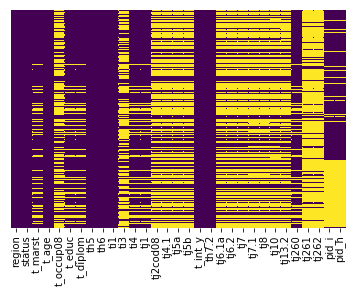

In [11]:
#print(ldata.isnull().sum())
sns.heatmap(ldata.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

Уберем всех, кто не работал по основному месту работу в последние 30 дней, а также тех, кто отказался называть свой заработок. Затем исключим всех, кто где-либо затруднился с ответом.

In [12]:
ldata = ldata[ldata['tj7']==1]
for i in list(ldata.columns):
    ldata = ldata[(ldata[i] != 99999997) & (ldata[i] != 99999998) & (ldata[i] != 99999999)]

In [13]:
ldata = ldata.dropna(subset=['tj10'])
ldata.isnull().sum()

region          0
status          0
t_marst         0
t_age           0
t_occup08       0
t_educ          0
t_diplom        0
th5             0
th6             0
ti1             0
ti3          2012
ti4             0
tj1             0
tj2cod08        0
tj4.1           0
tj5a            0
tj5b            0
t_int_y         0
th7.2           0
tj6.1a          0
tj6.2           0
tj7             0
tj7.1           0
tj8             0
tj10            0
tj13.2        307
tj260           0
tj261        3155
tj262        3155
pid_i        1257
pid_h        1257
dtype: int64

Пропуски в переменной ti3 связаны с тем, что респондент родился в том же населенном пункте, где живет сейчас (ti1 = 2).

In [14]:
ldata[ldata['ti1'] == 2].ti1.count()

2012

In [15]:
ldata['ti3'].fillna(ldata['status'], inplace = True)

Для людей с неназванной зарплатой за последние 12 месяцев я не придумала ничего лучше, чем просто вставить доход прошедшего месяца. Скорее всего это переменная не будет использоваться. 

In [16]:
ldata['tj13.2'].fillna(ldata['tj10'], inplace = True)

In [17]:
ldata['tj260'].describe()

count     3867.0
unique       2.0
top          2.0
freq      3155.0
Name: tj260, dtype: float64

Из графика ниже видно, что чуть меньше, чем большинтсво респондентов ответили, что не владеют иностранными языками.

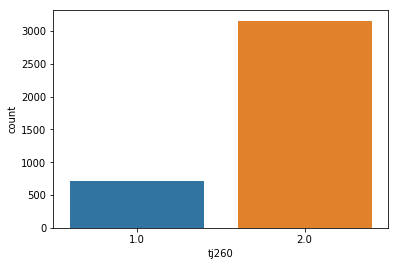

In [18]:
sns.countplot(x='tj260', data=ldata)

Большинство людей, давших положительный ответ на предыдущий вопрос, выбрали в качестве основного языка английский 

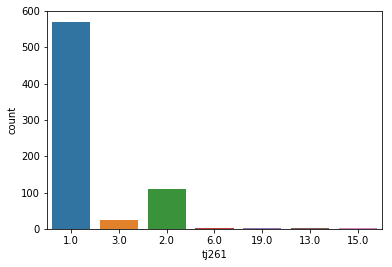

In [19]:
sns.countplot(x = 'tj261', data=ldata)

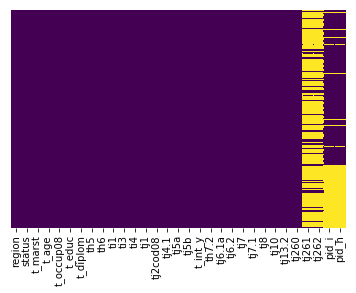

In [20]:
sns.heatmap(ldata.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

## Преобразование факторных переменных в бинарные
Вместо того, чтобы заполнять пропуски в данных в переменных tj261 и tj262, создадим столбцы бинарных переменных для английского, немецкого, французского и остальных языков. 

In [21]:
for i in ldata['tj261'].unique():
    if i == 1 or i == 2 or i == 3:
        ldata[str(i)] = (ldata['tj261'] == i).astype(float)
for i in ldata['tj261'].unique():
    if i != None and float(i)>=4: 
        ldata['other'] = (ldata['tj261'] == i).astype(float)
#ldata.drop(['tj261', 'tj262'], axis = 1)
ldata = ldata.rename(columns={'1.0': 'english', '2.0': 'german', '3.0': 'french'})

In [22]:
# бинарная переменная для пола
for i in ldata['th5'].unique():
    if i == 1:
        ldata['th5'] = (ldata['th5'] == i).astype(float)
ldata = ldata.rename(columns={'th5': 'male'})

Пусть переменная t_diplom обозначает наличие высшего образования у респондента. t_marst преобразуем в бинарную перемнную, равную 1, если респондент находится в браке. 

In [23]:
for i in ldata['t_diplom'].unique():
    if i == 6: #шесть это высшее образование и выше
        ldata['t_diplom'] = (ldata['t_diplom'] == i).astype(float)

In [24]:
for i in ldata['t_marst'].unique():
    if i == 2 or i == 3: # в браке или живете вместе 
        ldata['t_marst'] = (ldata['t_marst'] == i).astype(float)

Судя по описанию, переменная t_educ приблизительно равна количеству лет обучения респондента, поэтому оставим ее как есть. Плюс напишем функцию, которая преобразует факторные переменные в бинарные. 

In [25]:
def factor_to_binary(data, feature):
    for i in data[feature].unique():
        data[feature + '=' + i] = (data[feature] == i).astype(float)

In [26]:
ldata.head()

,region,status,t_marst,t_age,t_occup08,t_educ,t_diplom,male,th6,ti1,...,tj13.2,tj260,tj261,tj262,pid_i,pid_h,english,french,german,other
1,1,3,0.0,60,5,16,0.0,0.0,1955,1,...,23000.0,2,None,None,1.0012e+06,10012,0.0,0.0,0.0,0.0
7,1,4,0.0,61,8,14,0.0,1.0,1954,1,...,27000.0,2,None,None,1.0084e+06,10084,0.0,0.0,0.0,0.0
9,1,4,0.0,62,2,18,0.0,0.0,1953,1,...,19000.0,2,None,None,1.0085e+06,10085,0.0,0.0,0.0,0.0
10,1,4,0.0,61,3,18,0.0,0.0,1954,1,...,22000.0,2,None,None,1.0086e+06,10086,0.0,0.0,0.0,0.0
11,1,4,0.0,62,5,16,0.0,0.0,1953,1,...,20000.0,2,None,None,1.0088e+06,10088,0.0,0.0,0.0,0.0


## Модель
У меня все время всё вылетает с ошибкой "Shapes not aligned" или "operands could not be broadcast together with shapes" или еще  что-нибудь похожее на это. Гугл мне сильно не помог, и я не знаю, как это исправить :'(
Гретль открывает эти файлы через раз, и вообще я как-то не собиралась в нём проект делать. 

In [27]:
model = smf.ols('tj10 ~ 1 + male + t_age + I(t_age*t_age) + t_educ + english + french + german + other', data=ldata).fit(cov_type='HC0') 
print(model.summary())

ValueError: operands could not be broadcast together with shapes (3867,1,321) (3867,150) 

## Данные 20 волны
Загрузим данные репрезентативной выборки для 20 волны. [Описание переменных для 20 волны](https://www.hse.ru/data/2016/06/07/1247611077/R20_ind_codebook.pdf)

Про данные 20 волны: с ними тоже ничего хорошего не получилось. После того, как я попробовала сопоставить респондентов и их ответы в 2011 году, осталось 254 наблюдения. Может быть. ошибка в когде, или я идентификаторы перепутала? Если проблема не решится, можно ли рассматривать как вариант использование 20 волны, которая проводилась 10.2011 - 02.2012?

In [ ]:
import savReaderWriter as s
df20 = pd.DataFrame(list(s.SavReader('r20i_os26c.sav', returnHeader = True))) 

In [ ]:
df20.head()

In [ ]:
data20 = df20.rename(columns=df20.iloc[0].apply(lambda x: str(x)[2:-1]))

In [ ]:
data20.drop(data20.index[0], inplace=True)

In [ ]:
data20.head()

In [ ]:
data20['pj217a'].describe()

1. pj217a -- Какое образование было у Вашего отца или человека, который заменил Вам его, когда Вам было 15 лет?
2. pj217b -- Какое образование было у Вашей матери или женщины, которая заменила Вам ее, когда Вам было 15 лет?
3. pj216ac08  -- Код профессии по ISCO2008 работы отца респондента, когда респонденту было 15 лет
4. pj216bc08 -- Код профессии по ISCO2008 работы матери респондента, когда респонденту было 15 лет

In [ ]:
data['f_educ'] = data20.pid_h.map(data20['pj217a'])
data['f_educ'].describe()

In [ ]:
data['m_educ'] = data20.pid_h.map(data20['pj217b'])
data['m_educ'].describe()